In [ ]:
import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt
from time import time
from torchvision import datasets, transforms
from torch import nn, optim

In [ ]:
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])

In [ ]:
trainset = datasets.MNIST(r'..\input\MNIST', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

testset = datasets.MNIST(r'..\input\MNIST', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ..\input\MNIST/MNIST/raw/train-images-idx3-ubyte.gz to ..\input\MNIST/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ..\input\MNIST/MNIST/raw/train-labels-idx1-ubyte.gz to ..\input\MNIST/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ..\input\MNIST/MNIST/raw/t10k-images-idx3-ubyte.gz to ..\input\MNIST/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ..\input\MNIST/MNIST/raw/t10k-labels-idx1-ubyte.gz to ..\input\MNIST/MNIST/raw



/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [ ]:
dataiter = iter(trainloader)
images, labels = dataiter.next() 

print(images.shape)
print(labels.shape)

torch.Size([64, 1, 28, 28])
torch.Size([64])


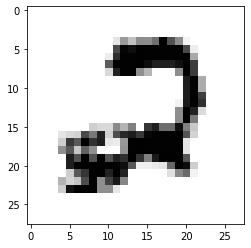

In [ ]:
plt.imshow(images[0].numpy().squeeze(), cmap='gray_r');


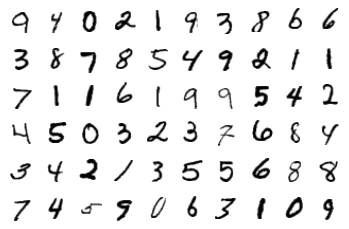

In [ ]:
figure = plt.figure()
num_of_images = 60
for index in range(1, num_of_images + 1):
    plt.subplot(6, 10, index)
    plt.axis('off')
    plt.imshow(images[index].numpy().squeeze(), cmap='gray_r')


In [ ]:
model=nn.Sequential(nn.Linear(784,128),
                    nn.ReLU(),          
                    nn.Linear(128,64),  
                    nn.Tanh(),          
                    nn.Linear(64,10),   
                    nn.LogSoftmax(dim=1) 
                  ) 

print(model)

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): Tanh()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): LogSoftmax(dim=1)
)


In [ ]:
criterion = nn.NLLLoss()

In [ ]:
images, labels = next(iter(trainloader))
images = images.view(images.shape[0], -1)

logps = model(images) 
loss = criterion(logps, labels) 

In [ ]:
print('Before backward pass: \n', model[0].weight.grad)
loss.backward() 
print('After backward pass: \n', model[0].weight.grad)

Before backward pass: 
 None
After backward pass: 
 tensor([[ 0.0021,  0.0021,  0.0021,  ...,  0.0021,  0.0021,  0.0021],
        [-0.0003, -0.0003, -0.0003,  ..., -0.0003, -0.0003, -0.0003],
        [ 0.0042,  0.0042,  0.0042,  ...,  0.0042,  0.0042,  0.0042],
        ...,
        [ 0.0019,  0.0019,  0.0019,  ...,  0.0019,  0.0019,  0.0019],
        [-0.0030, -0.0030, -0.0030,  ..., -0.0030, -0.0030, -0.0030],
        [-0.0060, -0.0060, -0.0060,  ..., -0.0060, -0.0060, -0.0060]])


In [ ]:
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

print('Initial weights - ', model[0].weight)

images, labels = next(iter(trainloader))
images.resize_(64, 784)


optimizer.zero_grad()


output = model(images)
loss = criterion(output, labels)

loss.backward()
print('Gradient -', model[0].weight.grad)

Initial weights -  Parameter containing:
tensor([[-0.0178,  0.0127,  0.0130,  ...,  0.0281, -0.0333, -0.0265],
        [ 0.0224,  0.0020, -0.0291,  ..., -0.0118,  0.0046, -0.0265],
        [-0.0304,  0.0198,  0.0170,  ...,  0.0350, -0.0322, -0.0156],
        ...,
        [ 0.0018,  0.0208,  0.0131,  ...,  0.0313,  0.0014,  0.0313],
        [ 0.0193,  0.0209, -0.0229,  ...,  0.0159,  0.0064, -0.0261],
        [-0.0356,  0.0265, -0.0203,  ...,  0.0339, -0.0082, -0.0093]],
       requires_grad=True)
Gradient - tensor([[ 0.0002,  0.0002,  0.0002,  ...,  0.0002,  0.0002,  0.0002],
        [-0.0041, -0.0041, -0.0041,  ..., -0.0041, -0.0041, -0.0041],
        [-0.0017, -0.0017, -0.0017,  ..., -0.0017, -0.0017, -0.0017],
        ...,
        [ 0.0030,  0.0030,  0.0030,  ...,  0.0030,  0.0030,  0.0030],
        [ 0.0032,  0.0032,  0.0032,  ...,  0.0032,  0.0032,  0.0032],
        [ 0.0024,  0.0024,  0.0024,  ...,  0.0024,  0.0024,  0.0024]])


In [ ]:
time0 = time()
epochs = 15
running_loss_list= []
epochs_list = []

for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:        
        images = images.view(images.shape[0], -1)        
        optimizer.zero_grad()      
        output = model(images)       
        loss = criterion(output, labels)           
        loss.backward()         
        optimizer.step()
        running_loss += loss.item()
        
    else:
        print("Epoch {} - Training loss: {}".format(e, running_loss/len(trainloader)))
print("\nTraining Time (in minutes) =",(time()-time0)/60)

Epoch 0 - Training loss: 0.4191501160531537
Epoch 1 - Training loss: 0.1833050406095125
Epoch 2 - Training loss: 0.12939127361270855
Epoch 3 - Training loss: 0.10393517233554457
Epoch 4 - Training loss: 0.08616921904909887
Epoch 5 - Training loss: 0.07399410424855297
Epoch 6 - Training loss: 0.06447641690671722
Epoch 7 - Training loss: 0.05831401674935757
Epoch 8 - Training loss: 0.04946428047816283
Epoch 9 - Training loss: 0.04507194652355143
Epoch 10 - Training loss: 0.04048899816262768
Epoch 11 - Training loss: 0.035349269786021556
Epoch 12 - Training loss: 0.03093178011055019
Epoch 13 - Training loss: 0.02876934884390337
Epoch 14 - Training loss: 0.025776581079607258

Training Time (in minutes) = 2.3279793500900268


In [ ]:
def classify(img, ps):
    ''' 
    Function for viewing an image and it's predicted classes.
    '''
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    ax2.set_yticklabels(np.arange(10))
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)
    plt.tight_layout()

Predicted Digit = 2


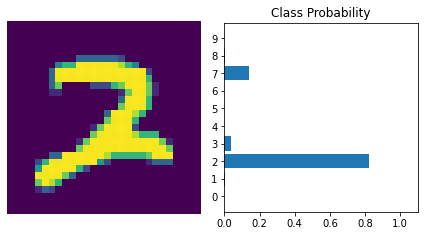

In [ ]:
images, labels = next(iter(testloader))


img = images[0].view(1, 784)

with torch.no_grad():
    logpb = model(img)


pb = torch.exp(logpb)
probab = list(pb.numpy()[0])
print("Predicted Digit =", probab.index(max(probab)))
classify(img.view(1, 28, 28), pb)

In [ ]:
correct_count, all_count = 0, 0
for images,labels in testloader:
  for i in range(len(labels)):
    img = images[i].view(1, 784)

    with torch.no_grad():
        logps = model(img)

    ps = torch.exp(logps)
    probab = list(ps.numpy()[0])
    pred_label = probab.index(max(probab))
    true_label = labels.numpy()[i]
    if(true_label == pred_label):
      correct_count += 1
    all_count += 1

print("Number Of Images Tested =", all_count)
print("\nModel Accuracy =", (correct_count/all_count))

Number Of Images Tested = 10000

Model Accuracy = 0.9738
